Polizzi Lucrezia, matricola:4935449. Ho implementato il codice su google colab in python, come chideva il compito ho fatto girare il Las Vegas Quicksort con R = 100000 e il grafico ottenuto è questo: 
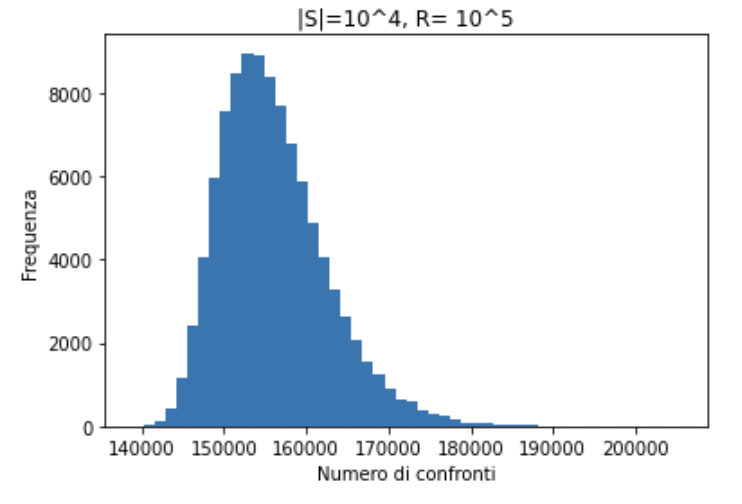

Inseguito ho calcolato il valore medio e la varianza empirica ( 156046.58441 e 42029240.757881835) che ho successivamente utilizzato per limitare dall'alto la probabilità con la quale LVQuickSort effettua il doppio e il triplo del valore atteso dei confronti mediante le disuguaglianze date. Possiamo notare come la frequenza empirica del doppio e del triplo del valore atteso sia zero mentre i limiti assumono valori molto piccoli. Ecco nel dettaglio i valori: 
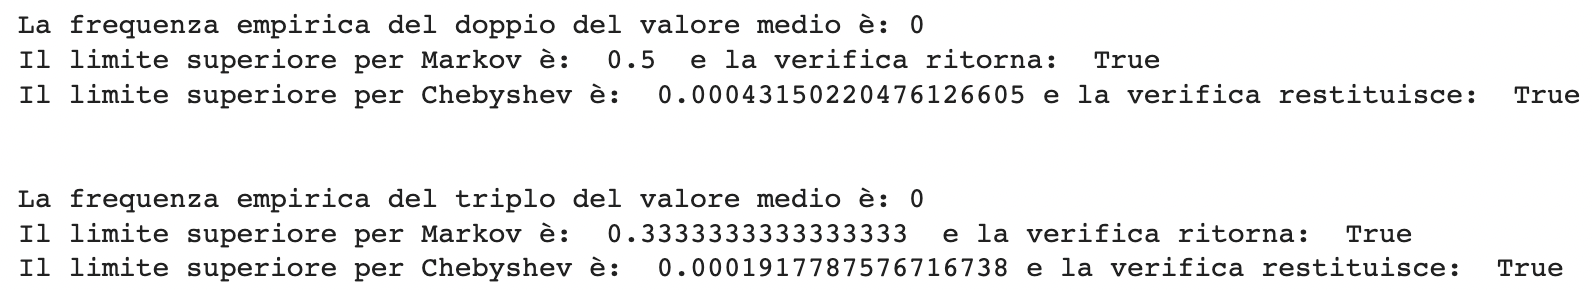

Di seguito ecco il codice:



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Implementazione Las Vegas Quicksort

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt


def LVQuickSort(S, start, end):
    count = 0
    if start < end:
        pivot = random.randint(start, end)
        temp = S[end]
        S[end] = S[pivot]
        S[pivot] = temp

        p, count = Partition(S, start, end)
        count += LVQuickSort(S, start, p - 1)
        count += LVQuickSort(S, p + 1, end)
    return count


def Partition(S, start, end):

    count = 0
    pivot = random.randint(start, end)
    temp = S[end]
    S[end] = S[pivot]
    S[pivot] = temp
    newPivotIndex = start - 1
    for index in range(start, end):

        count += 1
        if S[index] < S[end]:  
            newPivotIndex = newPivotIndex + 1
            temp = S[newPivotIndex]
            S[newPivotIndex] = S[index]
            S[index] = temp

    temp = S[newPivotIndex + 1]
    S[newPivotIndex + 1] = S[end]
    S[end] = temp
    return newPivotIndex + 1, count 

def valore_medio(Xr):
  R= 100000
  temp = 0
  for i in range(1, R):
    temp += Xr[i]

  return 1/R * temp 

def varianza_empirica(Xr, mu):
  R= 100000
  temp = 1/(R-1)
  d = 0
  for i in range(1, R):
    d += (Xr[i]-mu)*(Xr[i]-mu)

  return temp*d


if __name__ == "__main__": 
  # ci salvo il numero dei confronti
    Xr = []
    for i in range(100000):# numero di run
        S={}
        for j in range(0, 10000): # da zero a lunghezza di S
            S[j] = random.randint(0, 10000) # prendo numeri casuali e li metto in S
        Xr.append(LVQuickSort(S, 0, len(S) - 1)) # inserisco in Xr il numeri di confronti

     #calcolo valore medio mu con R= 100000
    valMedio = valore_medio(Xr)
    print("valore medio: ",valMedio)

#salvo su file il valore medio
    ValoreMedio_file = open('valoreMedio.txt', "w")
    ValoreMedio_file.write(str(valMedio))
    ValoreMedio_file.close()

  #calcolo varianza empirica R= 100000
    varEmp = varianza_empirica(Xr, valMedio)
    print("varianza empirica: ", varEmp)

#salvo su file il varianza empirica
    VarEmpirica_file = open('varianzaEmpirica.txt', "w")
    VarEmpirica_file.write(str(varEmp))
    VarEmpirica_file.close()

    plt.hist(Xr, bins=50)
    plt.gca().set(title='|S|=10^4, R= 10^5', xlabel='Numero di confronti',ylabel='Frequenza')





 Limita dall’alto la probabilita con la quale LVQuickSort effettua il doppio e il triplo del
valore atteso dei confronti mediante le disuguaglianze (4) e (6)


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt


NewValMedio = np.loadtxt("/content/valoreMedio.txt")
sigma = np.loadtxt("/content/varianzaEmpirica.txt")

R=100000
v2= 2
v3 =3

#disuguaglianza 4 
# Pr{X >= v*mu} <= mu/v*mu = 1/v

def disuguaglianza4(v,contmu, mu):
  a = mu/(v*mu) #limite
  pr = contmu/R #probabilità che si verifichi il doppio o il triplo del valore atteso
  c = False
  if pr <= a:
      c = True #ritorno anche il limite su cui faccio il confronto

  return c,a
  
#disuguaglianza 6
#Pr{X>= v*mu} <= sigma^2 / v^2*mu^2

def disuguaglianza6(contmu, sigma, v, mu):
  a = sigma/((v*v)*(mu*mu) )#limite
  b = False #verifico se rispetta il limite
  pr = contmu/R #probabilità che si verifichi il doppio o il triplo del valore atteso
  if pr <= a:
    b= True
  
  return True, a

dop_mu = 0
tri_mu=0


#conto quante volte LVQuickSort 
#effettua il doppio e il triplo del valor medio dei confronti.
for i in range(R):
  if Xr[i]> v2 * NewValMedio:
    dop_mu += 1
  if Xr[i]> v3 * NewValMedio:
    tri_mu += 1


# verifico i limiti
rispetta1,Lim1 = disuguaglianza4(v2,dop_mu, NewValMedio)
rispetta2,Lim2 = disuguaglianza4(v3, tri_mu, NewValMedio)

rispetta3, Lim3 = disuguaglianza6(dop_mu, sigma, v2, NewValMedio)
rispetta4, Lim4 = disuguaglianza6(tri_mu, sigma, v3, NewValMedio)

print("La frequenza empirica del doppio del valore medio è:",dop_mu)
print("Il limite superiore per Markov è: ",Lim1, " e la verifica ritorna: ",
      rispetta1 )
print("Il limite superiore per Chebyshev è: ",Lim3,"e la verifica restituisce: ",rispetta3)
print("\n")
print("La frequenza empirica del triplo del valore medio è:",tri_mu)
print("Il limite superiore per Markov è: ",Lim2, " e la verifica ritorna: ",
      rispetta2 )
print("Il limite superiore per Chebyshev è: ",Lim4,"e la verifica restituisce: ", rispetta4)



La frequenza empirica del doppio del valore medio è: 0
Il limite superiore per Markov è:  0.5  e la verifica ritorna:  True
Il limite superiore per Chebyshev è:  0.00043150220476126605 e la verifica restituisce:  True


La frequenza empirica del triplo del valore medio è: 0
Il limite superiore per Markov è:  0.3333333333333333  e la verifica ritorna:  True
Il limite superiore per Chebyshev è:  0.0001917787576716738 e la verifica restituisce:  True
